In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv("glassdoor_jobs.csv")

# **Exploring Dataset**

In [3]:
df.shape

(956, 15)

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [6]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


_**Note:** No feature has NaN values, but there may be the case where the NaN values are replaced by some other value(s) like -1, 0, etc._

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


_**Note:** NaN values are replace by -1 in numeric features._

# **Exploratory Data Analysis & Data Cleaning**
* Plotting bargraphs and countplots for numerical and categorical features respectively.
* Removing unwanted columns
* Handling NaN/missing values
* Removing unwanted alphabet/special characters from the features

In [9]:
# Removing unwanted column
print('Shape before removing: {}'.format(df.shape))
df.drop(labels=['Unnamed: 0'], axis='columns', inplace=True)
print('Shape after removing: {}'.format(df.shape))

Shape before removing: (956, 15)
Shape after removing: (956, 14)


In [10]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


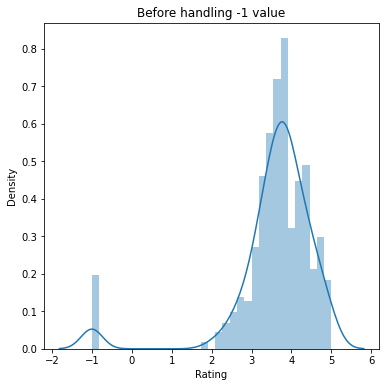

In [11]:
# Visualising Rating column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Before handling -1 value')

_**Note: Since the Rating feature follows the Gaussian/Normal Distribution**, we'll replace -1 values with mean of the distribution._

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


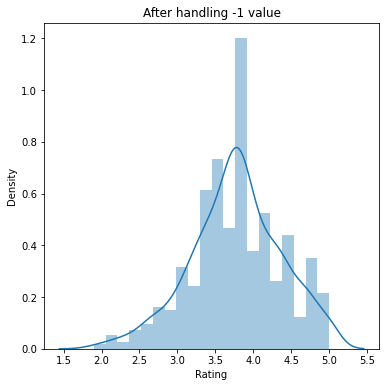

In [12]:
# Handling -1 values in Rating column
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('After handling -1 value')

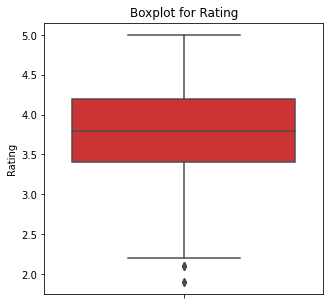

In [13]:
# Outliers in Rating
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Rating')
p = plt.ylabel('Rating')

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


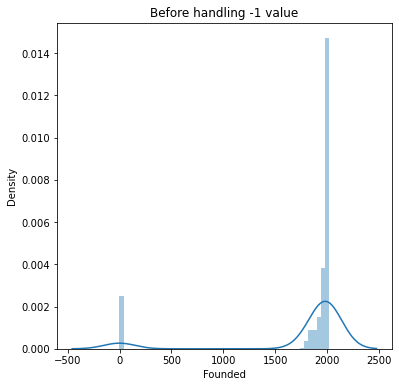

In [14]:
# Visualising Founded column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('Before handling -1 value')

_**Note: Since Founded feature does not follow Gaussian/Normal distribution but is Right-Skewed graph**, we'll replacing the -1 values with median of the distribution._

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


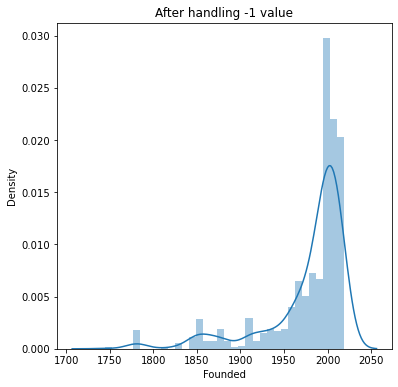

In [15]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Founded'])
p = plt.title('After handling -1 value')

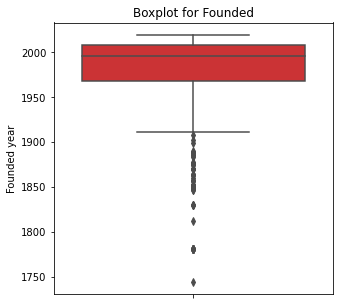

In [16]:
# Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Founded')
p = plt.ylabel('Founded year')

In [17]:
# Cleaning Job Title column
df['Job Title'].value_counts().nlargest(20)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [18]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['job_title'] = df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: job_title, dtype: int64

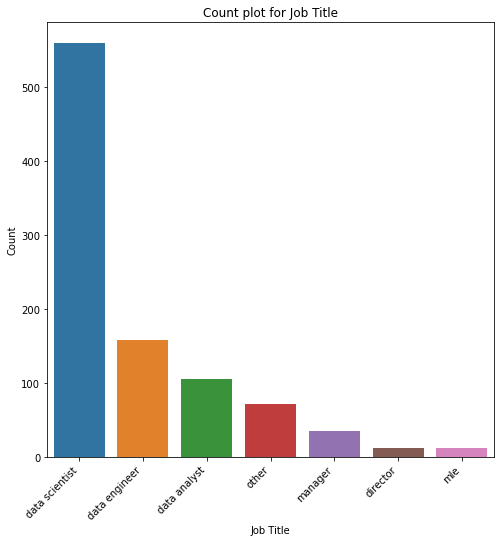

In [19]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [20]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

other    701
sr       252
jr         3
Name: job_seniority, dtype: int64

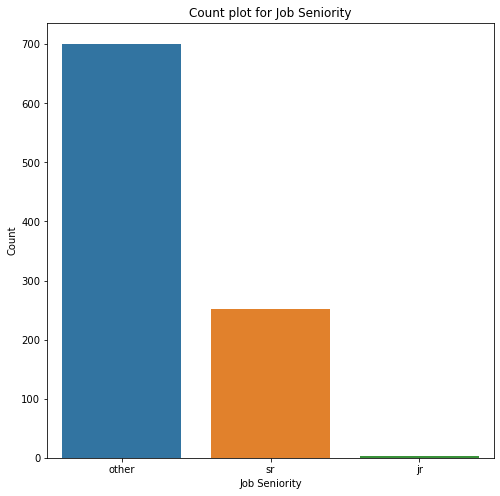

In [21]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [22]:
# Removing Job Title column
df.drop(labels=['Job Title'], axis=1, inplace=True)

In [23]:
# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [24]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [25]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [26]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [27]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

_**Note:** **Converting per hour salaries to per year salaries** (assuming 45 work hours per week and 52 working weeks), and removing **employer_provided_salary** from the salary array._

In [28]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [29]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


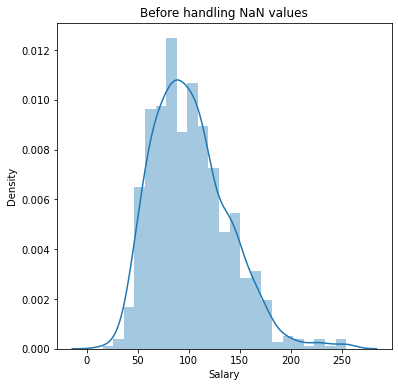

In [30]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Before handling NaN values')

_**Note: Since the Rating feature follows the Gaussian/Normal Distribution**, but since there are few outlies, we'll replace -1 values with median of the distribution._

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


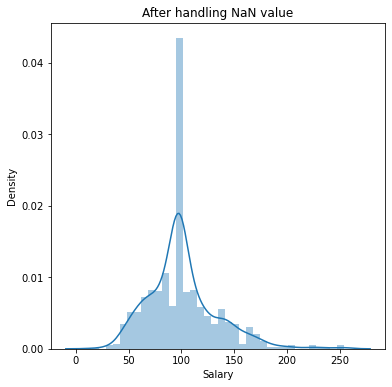

In [31]:
# Handling NaN values in Salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('After handling NaN value')

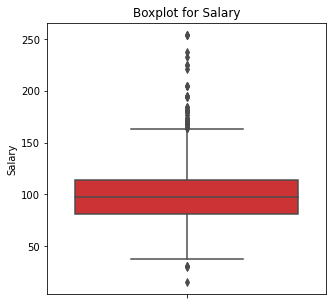

In [32]:
# Outliers in Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

In [33]:
# Cleaning Company Name column
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])

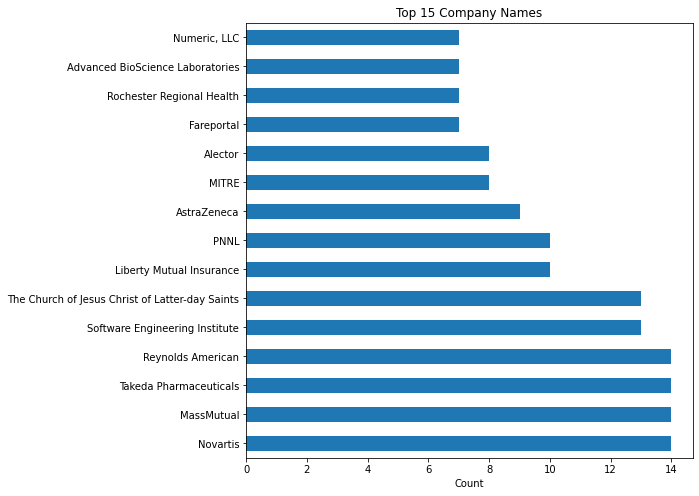

In [34]:
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [35]:
# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 46


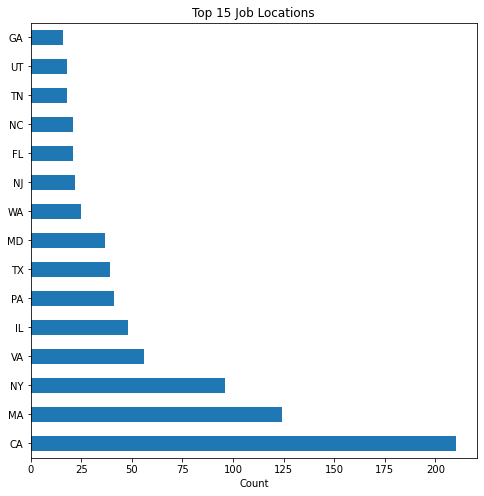

In [36]:
plt.figure(figsize=(8,8))
g = df["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

In [37]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [38]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

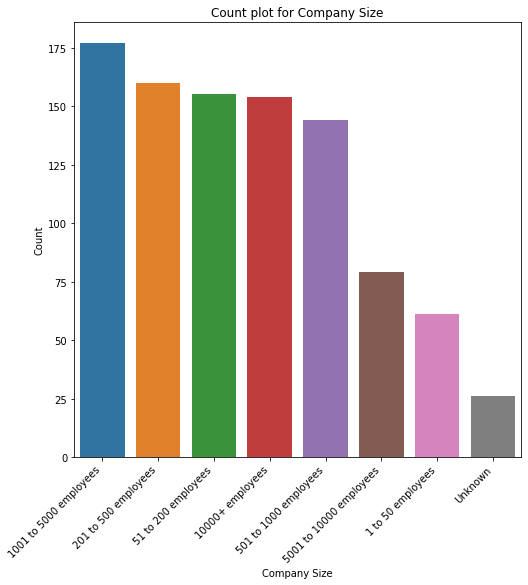

In [39]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [40]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [41]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

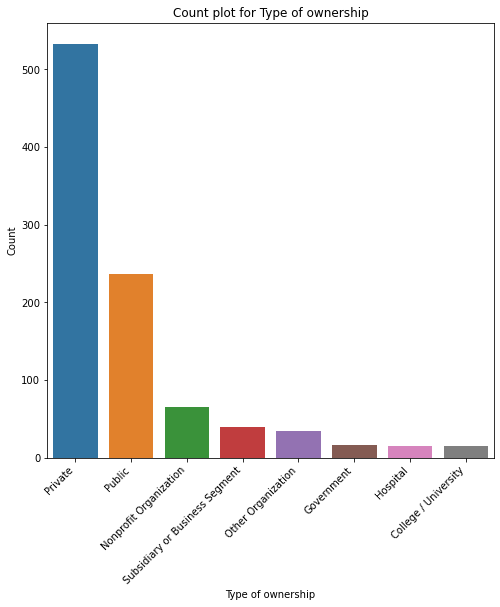

In [42]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [43]:
# Cleaning 'Industry' column
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [44]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

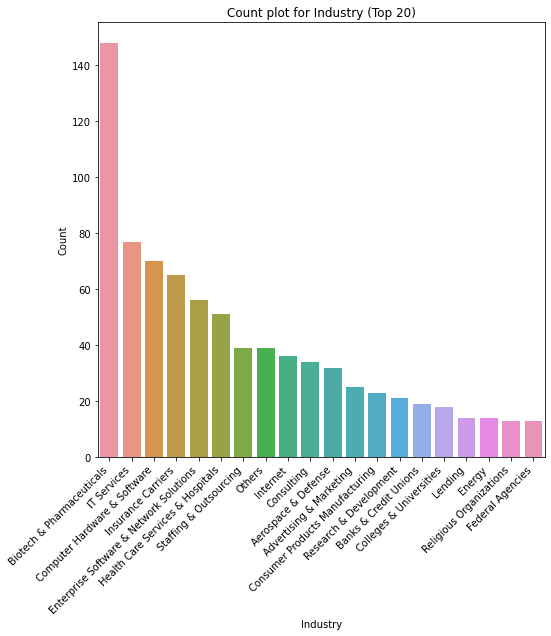

In [45]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [46]:
# Cleaning 'Sector' column
df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [47]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

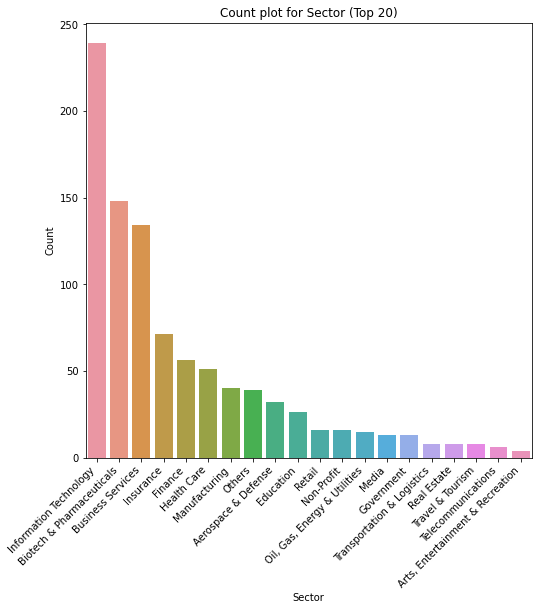

In [48]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [49]:
# Cleaning 'Revenue' column
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [50]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

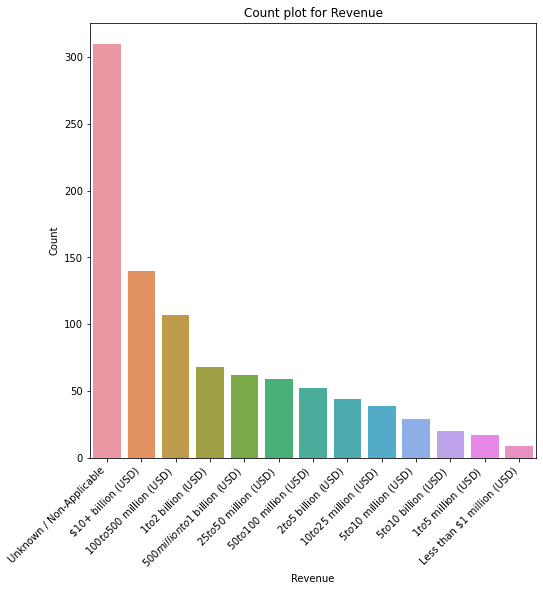

In [51]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [52]:
# Cleaning 'Competitors' column
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
954                                               Slalom
955                                                   -1
Name: Competitors, Length: 956, dtype: object

In [53]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

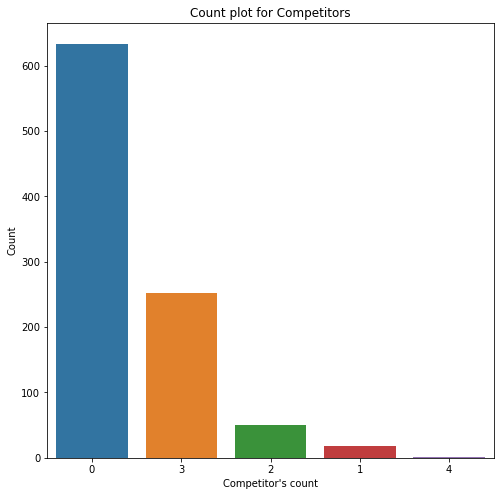

In [54]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

In [55]:
# Dataset till now
df.tail()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
951,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Public,Internet,Information Technology,$100 to $500 million (USD),3,data engineer,sr,102.5,TN
952,$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,data scientist,other,73.5,PA
953,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,1996,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,manager,other,127.5,PA
954,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,"Austin, TX","Portland, OR",201 to 500 employees,2015,Private,IT Services,Information Technology,$25 to $50 million (USD),1,data engineer,other,97.5,TX
955,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),0,data scientist,other,93.5,OH


C:\Users\chait\AppData\Local\Temp\ipykernel_17756\2160249353.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


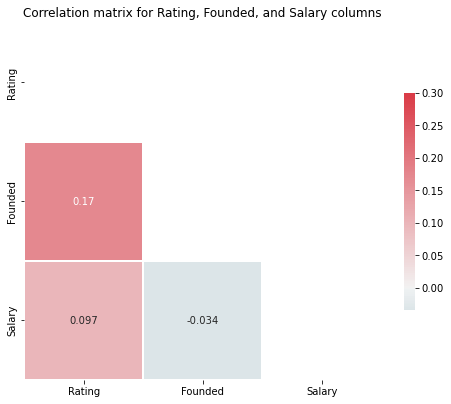

In [56]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

_**Insight:** Rating-Founded columns have **positive correlation**, whereas Salary-Founded columns have **negative correlation**. Also since the correlation is not high amongst all these numerical features, there is **no case of multicolliniearity.**_

# **Feature Engineering**
* Creating new features from existing features
* Trimming Columns
* Handling ordinal and nominal categorical features
* Feature Selection


**Creating new features from existing features**
* Adding column of _job_in_headquarters_
* Adding columns of _python, excel, sql, tableau jobs_





In [57]:
# Creating column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

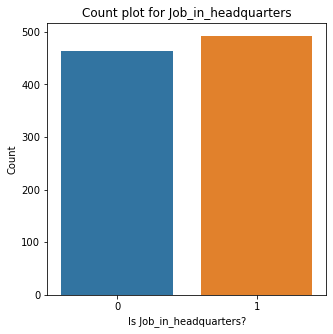

In [58]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel("Is Job_in_headquarters?")
p = plt.ylabel('Count')

In [59]:
df.drop(labels=['Location'], axis=1, inplace=True)

In [60]:
# Creating columns of 'python, excel, sql, tableau' jobs
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

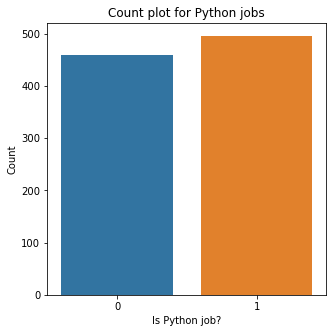

In [61]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=df)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')

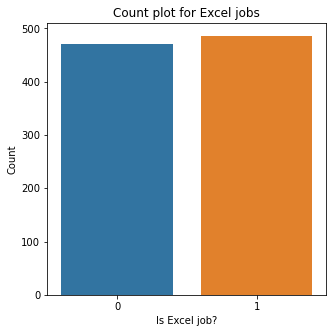

In [62]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=df)
p = plt.title('Count plot for Excel jobs')
p = plt.xlabel("Is Excel job?")
p = plt.ylabel('Count')

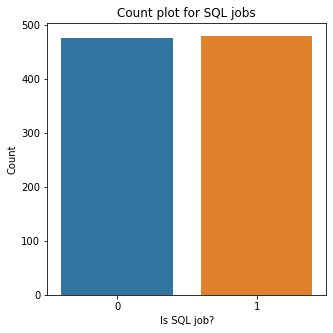

In [63]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=df)
p = plt.title('Count plot for SQL jobs')
p = plt.xlabel("Is SQL job?")
p = plt.ylabel('Count')

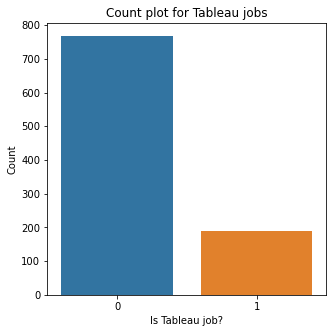

In [64]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=df)
p = plt.title('Count plot for Tableau jobs')
p = plt.xlabel("Is Tableau job?")
p = plt.ylabel('Count')

In [65]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

**• Trimming Columns**<br/>
_Features having more than 10 categories are trimmed so as to **reduce the dimensionality.**_

In [66]:
# Trimming the 'Sector' column

# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

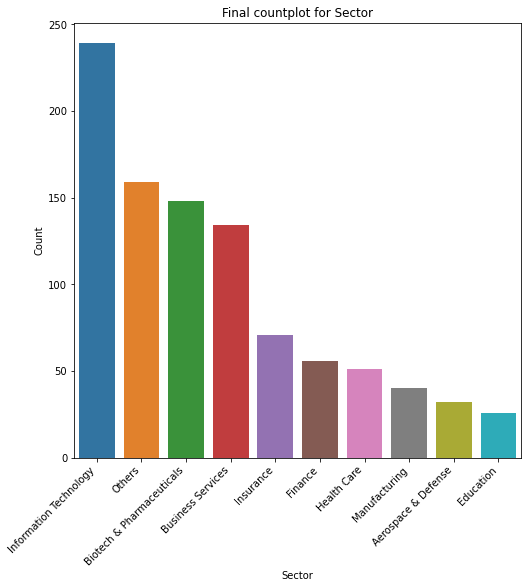

In [67]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('Final countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [68]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)

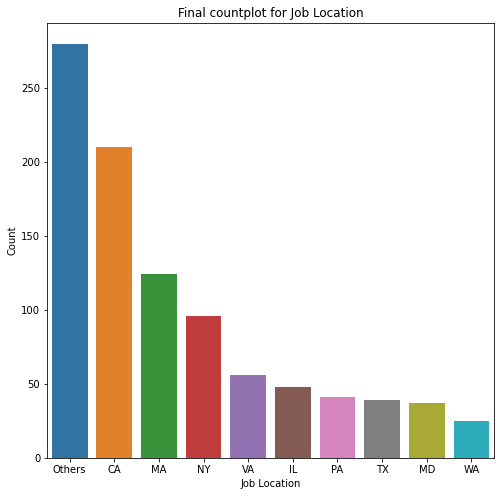

In [69]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
p = plt.title('Final countplot for Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Count')

In [70]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [71]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [72]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

**• Handling ordinal categorical features**<br/>
_Ordinal features are **categorical variables that have some order associated with them** (e.g. size, rating, remark, etc.)_

In [73]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [74]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [75]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

**• Handling nominal categorical features**<br/>
_Nominal features are **categorical variables that have no numerical importance** (e.g. occupation, name, etc.)_

In [76]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (956, 15)
After: (956, 22)


In [77]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 22)
After: (956, 31)


In [78]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 31)
After: (956, 37)


In [79]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

**• Feature Selection**<br/>
_Selecting features based on **information gain (mutual_info_regression) and correlation matrix**_

In [80]:
X = df.drop('salary', axis=1)
y = df['salary']

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [82]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000001A527282940>)

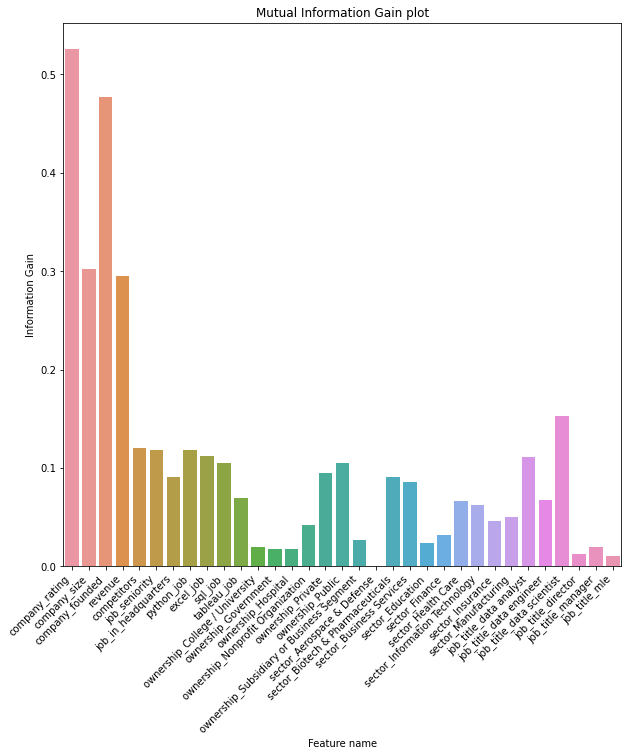

In [83]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

_**Insight:** From feature importance chart, it is evident that there are **atleast 20 features that impact the target variable.**_

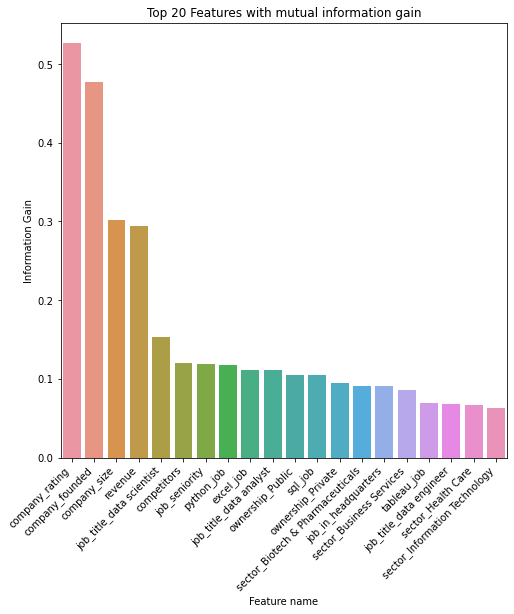

In [84]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

C:\Users\chait\AppData\Local\Temp\ipykernel_17756\3686405298.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


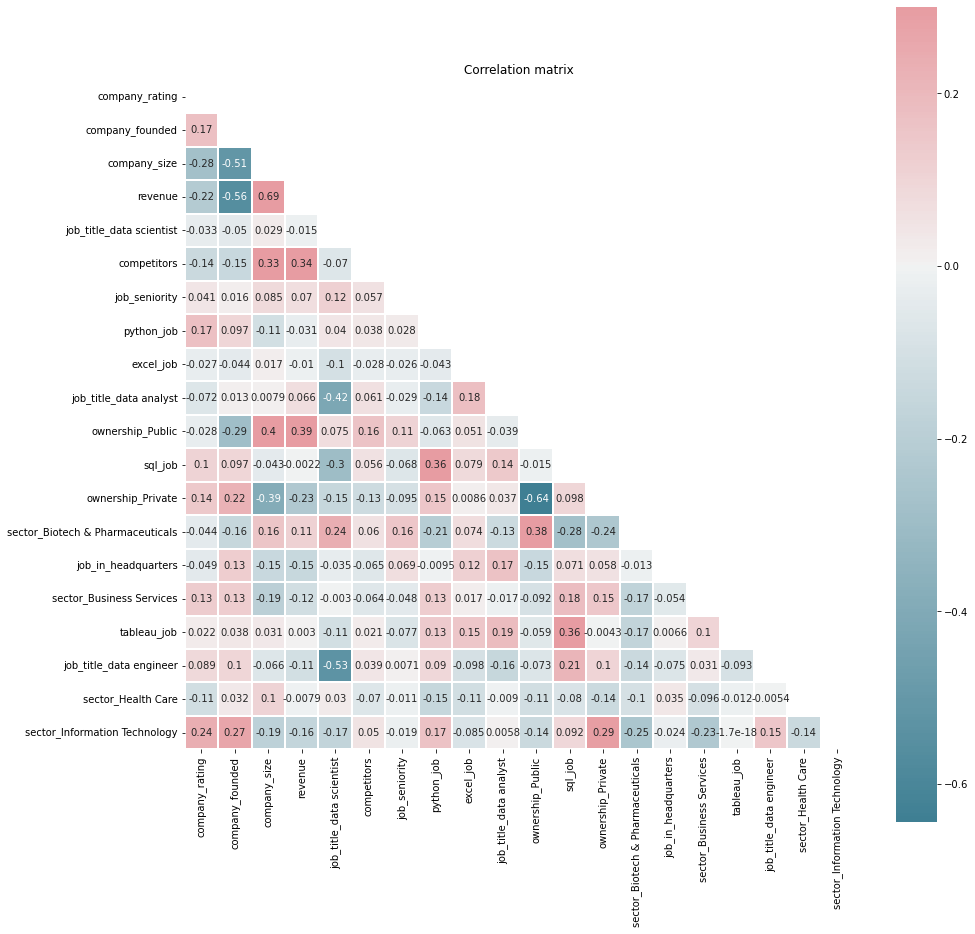

In [85]:
# Finding and plotting the correlation matrix for top20 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_feature.index].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

_Range of correlation are as follows:_
* **Strong correlation: X > 0.7**
* **Moderate correlation: 0.5 < X < 0.7**
* **Weak correlation: X < 0.5**
<br/><br/>

**Insight:** From the correlation matrix, it is evident that features **(ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated.** Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features.

In [86]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)

C:\Users\chait\AppData\Local\Temp\ipykernel_17756\4207917739.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


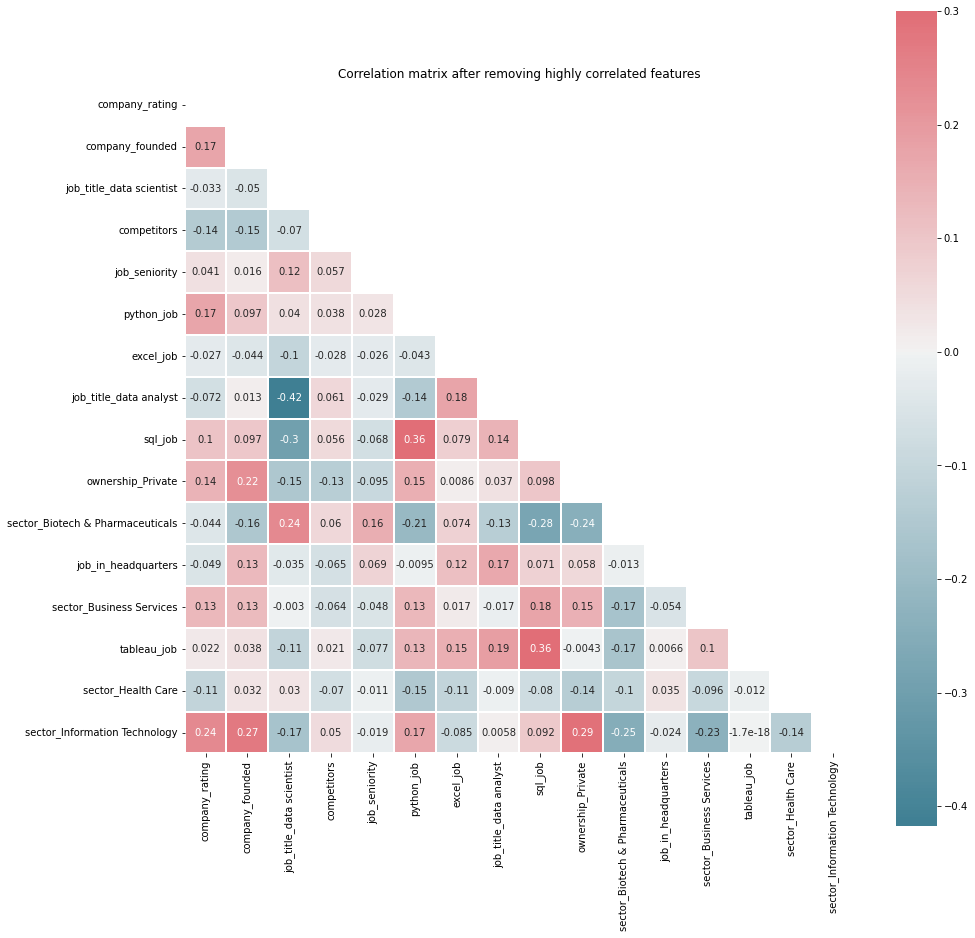

In [87]:
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [88]:
X.columns

Index(['company_rating', 'company_founded', 'job_title_data scientist',
       'competitors', 'job_seniority', 'python_job', 'excel_job',
       'job_title_data analyst', 'sql_job', 'ownership_Private',
       'sector_Biotech & Pharmaceuticals', 'job_in_headquarters',
       'sector_Business Services', 'tableau_job', 'sector_Health Care',
       'sector_Information Technology'],
      dtype='object')

In [89]:
# Rearranging the columns

X = X[['company_rating', 'company_founded', 'competitors',
       'sector_Health Care', 'sector_Business Services', 'sector_Information Technology',
       'ownership_Private', 'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

**Feature Scaling**<br/>
Scaling features using **StandardScaler library**

In [90]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,3.8,1973,0,0,0,0,1,0,1,0,0,0,1,1,1,0
1,3.4,1984,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4.8,2010,0,0,1,0,1,0,1,0,0,1,1,1,0,1
3,3.8,1965,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2.9,1998,3,0,1,0,1,0,1,0,0,1,1,1,0,1


In [91]:
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chait\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


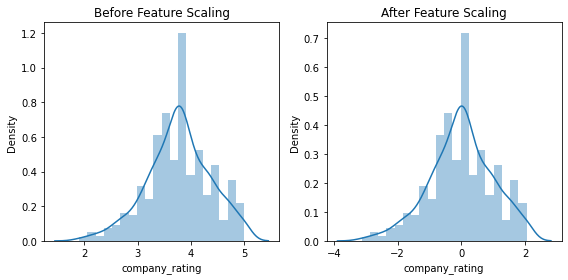

In [92]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

_**Insight: Feature Scaling doesnot change the distribution of the data**, it only reduces the scale of that particular feature._

In [93]:
X.head()

,company_rating,company_founded,competitors,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,excel_job,python_job,tableau_job,sql_job
0,0.048588,-0.086728,0,0,0,0,1,0,1,0,0,0,1,1,1,0
1,-0.620043,0.138799,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1.720165,0.671863,0,0,1,0,1,0,1,0,0,1,1,1,0,1
3,0.048588,-0.250748,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,-1.455831,0.425833,3,0,1,0,1,0,1,0,0,1,1,1,0,1


# **Model Building & Evaluation**
_Metric: Negative Root Mean Squared Error (NRMSE)_

* Multiple Linear Regression: -27.523 NRMSE
* Lasso Regression (L1 Regularization): -27.993 NRMSE
* **Random Forest (Ensemble): -17.637 NRMSE**
* Gradient Boosting: -24.429 NRMSE
* Voting (Random Forest + Gradient Boosting): -19.136 NRMSE


In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.523 ---
Standard Deviation: 2.307


In [96]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.993 ---
Standard Deviation: 1.796


In [97]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -17.773 ---
Standard Deviation: 5.43


In [98]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -24.453 ---
Standard Deviation: 2.522


_**Note: Random Forest & Gradient Boosting algorithms are selected amongst all the other algorithms** because they have the highest value for Negative Root Mean Squared Error (NRMSE) i.e. lowest value for Root Mean Squared Error (RMSE) metric. And **fed to Voting algorithm** to reduce the error!_

In [99]:
# Fitting Random Forest and Gradient Boosting to Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -19.148 ---
Standard Deviation: 4.226


_**Note:** Voting algorithm too did not perform well as compared to Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_

# **Making Predictions**

In [100]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [101]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
  prediction_input.append(competitors)
  

  sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [102]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 90464(USD) to 108464(USD) per annum.


C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [103]:
# Prediction 2
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 81565(USD) to 99565(USD) per annum.


C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\chait\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [106]:
# Create pickle file using serialization 
import pickle 
pickle.dump(rf, open('rf.pkl', 'wb'))